<a href="https://colab.research.google.com/github/dutt-2302/Identification_GYM_Equipment/blob/main/Training_Model_File_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 45.1MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


 **upload kaggle.json file** 

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle (3).json to kaggle (3).json


In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

**download the dataset from own kaggle id**

In [ ]:
! kaggle datasets download -d dutt2302/gym-equipment

 95% 21.0M/22.1M [00:00<00:00, 25.5MB/s]
100% 22.1M/22.1M [00:00<00:00, 55.6MB/s]


unzip file

In [ ]:
!unzip "*.zip"

Archive:  gym-equipment.zip
  inflating: gym_data/aerobic_steppers/00000000.jpg  
  inflating: gym_data/aerobic_steppers/00000001.jpg  
  inflating: gym_data/aerobic_steppers/00000002.jpg  
  inflating: gym_data/aerobic_steppers/00000003.jpg  
  inflating: gym_data/aerobic_steppers/00000004.jpg  
  inflating: gym_data/aerobic_steppers/00000005.jpg  
  inflating: gym_data/aerobic_steppers/00000006.jpg  
  inflating: gym_data/aerobic_steppers/00000007.jpg  
  inflating: gym_data/aerobic_steppers/00000008.jpg  
  inflating: gym_data/aerobic_steppers/00000009.jpg  
  inflating: gym_data/aerobic_steppers/00000010.jpg  
  inflating: gym_data/aerobic_steppers/00000011.jpg  
  inflating: gym_data/aerobic_steppers/00000012.jpg  
  inflating: gym_data/aerobic_steppers/00000013.jpg  
  inflating: gym_data/aerobic_steppers/00000014.jpg  
  inflating: gym_data/aerobic_steppers/00000015.jpg  
  inflating: gym_data/aerobic_steppers/00000016.jpg  
  inflating: gym_data/aerobic_steppers/00000017.jpg  


In [ ]:
os.listdir("gym_data")

['elliptical',
 'rowing_machine',
 'dumb_bell',
 'bench_press',
 'aerobic_steppers',
 'multi_machine',
 'treadmill']

**batch size**

In [ ]:
bs = 64

In [ ]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("gym_data"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

**looking data**

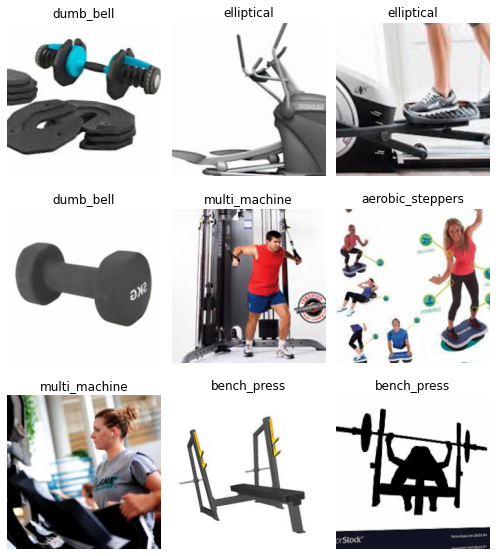

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

**training the model**

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.363701,0.807706,0.826021,00:33
1,0.898475,0.658286,0.827534,00:30
2,0.622612,0.590074,0.845688,00:30
3,0.469888,0.571932,0.853253,00:30


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

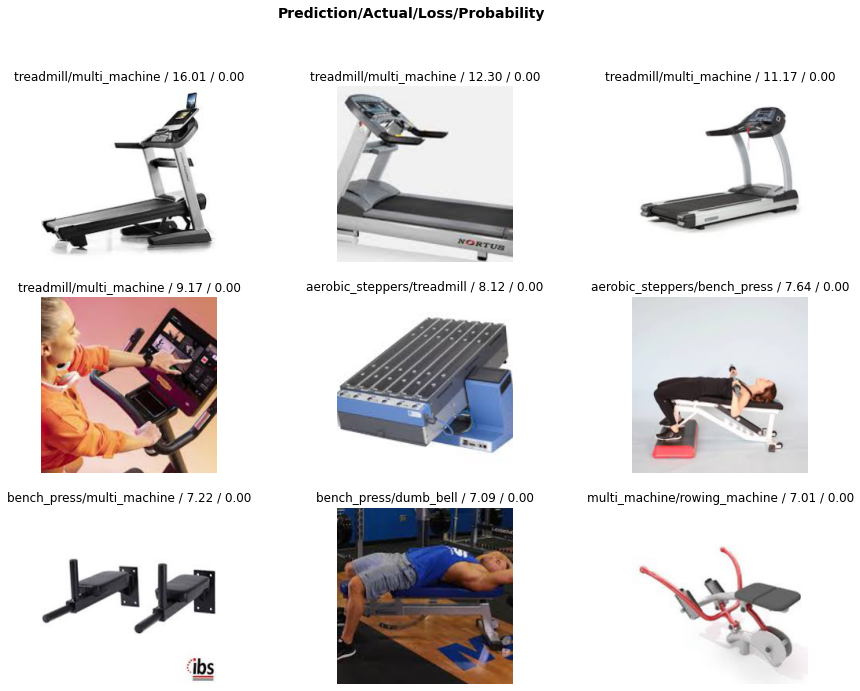

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

**making confusion matrix**

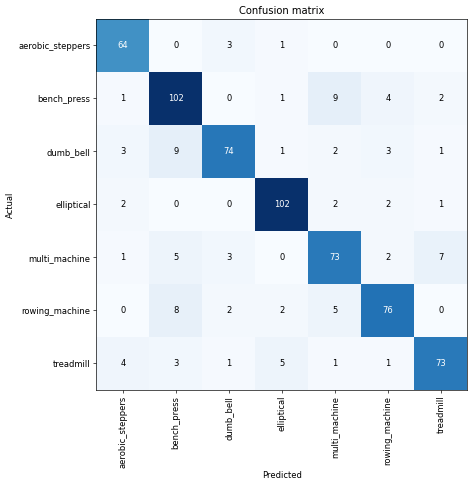

In [ ]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

**learning rate**

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


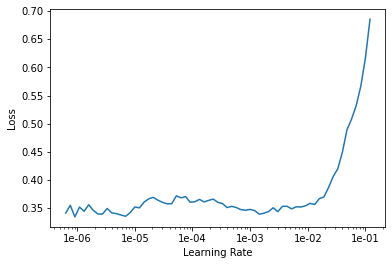

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.makedirs("/content/drive/My Drive/Fitness-Equipments_Kamal_GeeksMan-AI-Squad",exist_ok=True)

In [ ]:
my_dir = "/content/drive/My Drive/Fitness-Equipments_Kamal_GeeksMan-AI-Squad"

In [ ]:
learn.save(my_dir + "/stage-1")

**unfreez the model**

In [ ]:
learn.unfreeze()

**again training the moodel**

In [ ]:
learn.fit_one_cycle(11)

epoch,train_loss,valid_loss,accuracy,time
0,0.030381,0.572730,0.888048,00:33
1,0.067566,1.086262,0.792738,00:33
2,0.254171,1.040767,0.815431,00:33
3,0.326441,0.856062,0.765507,00:33
4,0.305649,0.585270,0.859304,00:33
5,0.238342,0.519995,0.859304,00:33
6,0.176279,0.481589,0.869894,00:33
7,0.119863,0.518667,0.889561,00:33
8,0.083913,0.469647,0.888048,00:33
9,0.059339,0.474697,0.898638,00:33


In [ ]:
learn.export(my_dir+"/export.pkl")

**install -U kora**

In [ ]:
!pip install -U kora
from kora.drive import upload_public

In [ ]:
pkl = my_dir + "/export.pkl"

In [ ]:
url = upload_public(pkl)

In [ ]:
url

'https://drive.google.com/uc?id=1t25P1j3A1Iou5sz24HOk4LrS2vQQfiZM'